## Machine Learning (Prediction of transaction type)

We will train 4 Classification models to try to predict if a certain transation is fradulant or not.

* Logistic Regression
* Decision Trees
* K-Nearest Neighbor
* SVC 

We will evaluate the models using:
* recall score
* accuracy score
* precision score 
* f1 score 
* roc AUC score 

Due to to the imblance of classes saw in our EDA notebook we will use the estimator with the highest AUC Score, as the best estimator. 

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, roc_auc_score, confusion_matrix

In [2]:
## initilizing classifiers

Log_clf = LogisticRegressionCV()
DT_clf = DecisionTreeClassifier()
KNC_clf = KNeighborsClassifier()
SVC_clf = SVC()


classifiers = [Log_clf, DT_clf, KNC_clf, SVC_clf]

In [3]:
# Here we will write a function to predict fraud, and score our results
# given the model, the data given, target label, and test size
def predict_fraud(model, data, labels, test_size ):
    # splitting the training and testing data 
    X = data.drop(labels, axis=1)
    y = data[labels]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size, random_state=42)
   
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    # fitting the model to the training data
    clf = model
    clf.fit(X_train, y_train)
    

    # predicting and returning various metrics
    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred) 
    prec_score = precision_score(y_test, y_pred)
    rec_score = recall_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)

    scores = [acc_score, prec_score, rec_score, auc_score ]
    return {clf.__class__.__name__: scores}, y_pred, scores  # using dunder methods to return dict with model name, scores for model, and prediction




In [4]:
score_results = {}
predictions = {}

data = pd.read_csv('creditcard.csv')
# looping through each of the classifiers we want to evaluate 
# updating each respective dictonary for scores and actual prediction values
for classifier in classifiers:
    score_result, prediction, scores = predict_fraud(classifier, data, 'Class', .33)
    # print(scores)
    score_results.update(score_result)
    predictions.update({classifier.__class__.__name__: prediction})

# creating dataframes out of dictionaries (easier to view)
score_df = pd.DataFrame.from_dict(score_results, orient='index', columns= ['acc_score', 'prec_score', 'rec_score', 'auc_score' ]).reset_index() 
pred_df = pd.DataFrame.from_dict(predictions)


print(score_df.head(len(scores)))

# print(pred_df.head(15))

C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

                    index  acc_score  prec_score  rec_score  auc_score
0    LogisticRegressionCV   0.999245    0.854545   0.630872   0.815351
1  DecisionTreeClassifier   0.999106    0.685714   0.805369   0.902392
2    KNeighborsClassifier   0.998468    1.000000   0.033557   0.516779
3                     SVC   0.998415    0.000000   0.000000   0.500000


C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


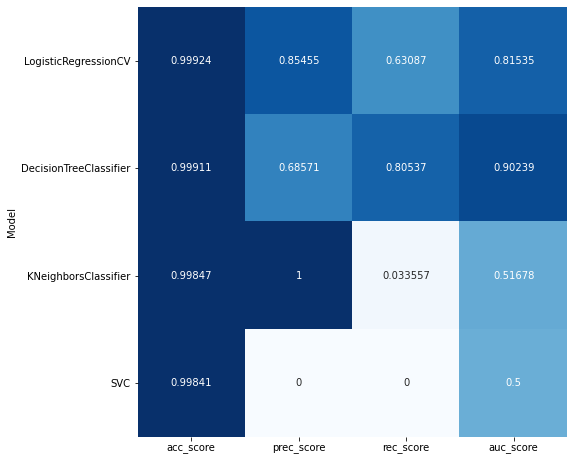

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

score_df.rename(columns={'index':'Model'}, inplace=True)

# plotting df as corr to save as fig
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(score_df.set_index('Model'), annot=True, fmt='.5g', ax = ax, cbar=False, square=True, cmap='Blues')
fig.tight_layout()

fig.savefig('images/results_table.png')

In [37]:
score_df.set_index('Model ')

,acc_score,prec_score,rec_score,auc_score
Model,,,,
LogisticRegressionCV,0.999245,0.854545,0.630872,0.815351
DecisionTreeClassifier,0.999106,0.685714,0.805369,0.902392
KNeighborsClassifier,0.998468,1.000000,0.033557,0.516779
SVC,0.998415,0.000000,0.000000,0.500000


Finally here we can see that though most of the models have a realatively high accuarcy score only DecisionTreeClassifier has an AUC score of .91 which is significantly larger than all the other scores. Though our precision score is lower compareably to tother except for SVC, due to the high imblance in our data AUC score is more importate for correct analysis. 